In [1]:
install.packages('datarium')
library(datarium)

'C:/Users/justk/Documents/R/win-library/4.1'의 위치에 패키지(들)을 설치합니다.
(왜냐하면 'lib'가 지정되지 않았기 때문입니다)



package 'datarium' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\justk\AppData\Local\Temp\RtmpMhFlhk\downloaded_packages


Warning message:
"패키지 'datarium'는 R 버전 4.1.3에서 작성되었습니다"


In [2]:
t(performance)

id,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
gender,male,male,male,male,male,male,male,male,male,male,...,female,female,female,female,female,female,female,female,female,female
stress,low,low,low,low,low,low,low,low,low,low,...,high,high,high,high,high,high,high,high,high,high
t1,5.964417,5.506574,5.625011,5.710243,5.736350,5.616418,5.476803,5.644752,6.057531,5.864048,...,5.593956,5.486839,5.452907,5.659519,5.273704,5.368449,5.489559,5.765244,5.578024,5.422013
t2,5.578506,5.819924,5.471414,5.786593,5.718538,5.680656,5.598871,5.919890,5.839342,5.573202,...,5.061280,5.096092,5.369373,5.359335,5.245224,5.769302,5.619406,5.433761,5.327330,5.079942


In [3]:
library(ggplot2)

Warning message:
"패키지 'ggplot2'는 R 버전 4.1.3에서 작성되었습니다"


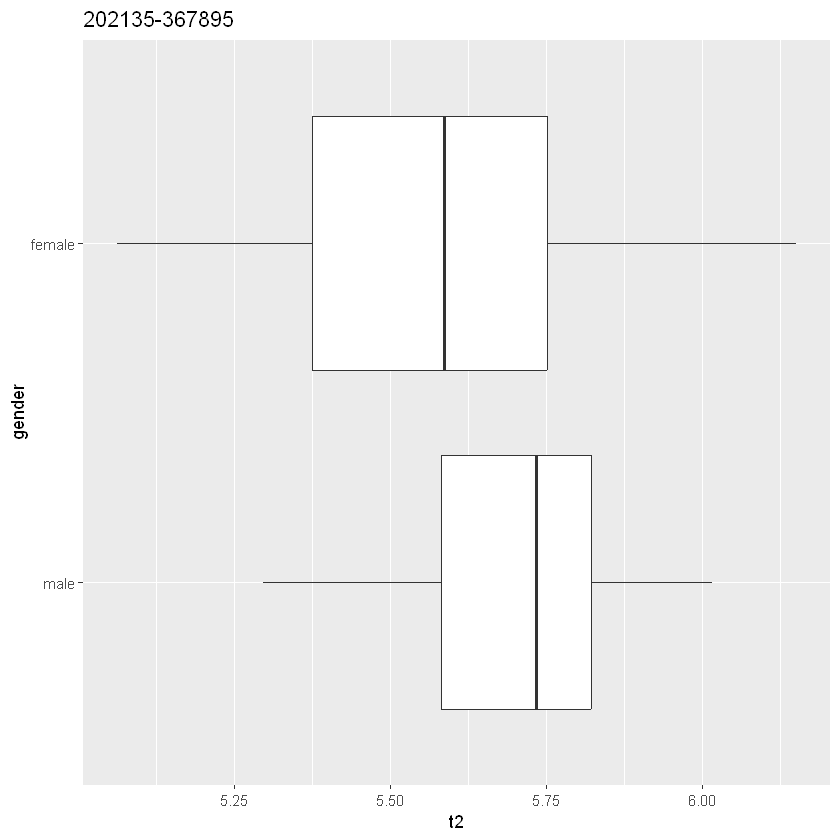

In [8]:
ggplot(data=performance, aes(x=t2,y=gender)) + geom_boxplot() + ggtitle("202135-367895")

In [17]:
male <- performance$t2[performance$gender=='male']
female <- performance$t2[performance$gender=='female']
t.test(male, female, alternative='greater')


	Welch Two Sample t-test

data:  male and female
t = 2.0417, df = 47.396, p-value = 0.02338
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.02190816        Inf
sample estimates:
mean of x mean of y 
 5.701607  5.578743 


In [21]:
for(stress in unique(performance$stress)){
    m <- mean(performance$t2[performance$stress==stress])
    print(m)
}

[1] 5.740256
[1] 5.693505
[1] 5.486764


In [22]:
y <- performance$t2
x <- performance$stress
oneway.test(y ~ x, var.equal = T)


	One-way analysis of means

data:  y and x
F = 7.8311, num df = 2, denom df = 57, p-value = 0.0009889


In [23]:
cut(performance$t2, c(0,5.5,5.8,Inf))

[1] (5.5,5.8] (5.8,Inf] (0,5.5]   (5.5,5.8] (5.5,5.8] (5.5,5.8] (5.5,5.8]
 [8] (5.8,Inf] (5.8,Inf] (5.5,5.8] (5.5,5.8] (5.5,5.8] (5.5,5.8] (5.5,5.8]
[15] (5.8,Inf] (5.8,Inf] (5.5,5.8] (5.5,5.8] (5.5,5.8] (5.8,Inf] (5.5,5.8]
[22] (0,5.5]   (0,5.5]   (5.8,Inf] (5.5,5.8] (5.8,Inf] (5.5,5.8] (0,5.5]  
[29] (5.5,5.8] (5.8,Inf] (5.5,5.8] (5.8,Inf] (5.5,5.8] (5.5,5.8] (5.5,5.8]
[36] (5.8,Inf] (5.8,Inf] (5.5,5.8] (5.5,5.8] (5.5,5.8] (0,5.5]   (5.8,Inf]
[43] (0,5.5]   (5.5,5.8] (5.5,5.8] (5.8,Inf] (5.5,5.8] (0,5.5]   (5.8,Inf]
[50] (0,5.5]   (0,5.5]   (0,5.5]   (0,5.5]   (0,5.5]   (0,5.5]   (5.5,5.8]
[57] (5.5,5.8] (0,5.5]   (0,5.5]   (0,5.5]  
Levels: (0,5.5] (5.5,5.8] (5.8,Inf]

In [53]:
high <- c(0,0,0)
moderate <- c(0,0,0)
low <- c(0,0,0)
grp <- cut(performance$t2, c(0,5.5,5.8,Inf))
for(i in 1:length(performance$t2)){
    idx <- 0
    for(gr in unique(grp)){
        idx <- idx + 1
        if(gr==grp[i]){
            break
        }
    }
    if('high' == performance$stress[i]){
        high[idx] <- high[idx] + 1
    }else if('moderate' == performance$stress[i]){
        moderate[idx] <- moderate[idx] + 1
    }else{
        low[idx] <- low[idx] + 1 
    }
}
high
moderate
low

[1]  6  3 11

[1] 10  6  4

[1] 13  6  1

In [55]:
chisq.test(matrix(c(high, moderate, low), ncol=3, byrow=T))


	Pearson's Chi-squared test

data:  matrix(c(high, moderate, low), ncol = 3, byrow = T)
X-squared = 13.627, df = 4, p-value = 0.008587
